<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/Simulaci%C3%B3n_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Juego de monedas

- **Ejemplo**: juego con monedas
  - Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento...
  - ¿Son todos los sectores igualmente probables cuando pase mucho tiempo?

- **Variable de estado = posición de la ficha {verde, rojo, naranja, azul}**
  - Los posibles estados en los monedas: CC, CX, XC, XX
    - Probabilidad: $1/4, 1/2, 1/4$

Entonces, en cada paso:

- 25% de probabilidad de **no moverse** (0 pasos),
- 50% de moverse **1 paso**,
- 25% de moverse **2 pasos**.

Queremos saber si **tras muchos juegos** cada sector es igualmente probable.

---

### Denotemos por:

$x_n$ a la probabilidad de estar en el sector $naranja$ tras $n$ lanzamientos

$y_n$ a la probabilidad de estar en el sector $azul$ tras $n$ lanzamientos

$z_n$ a la probabilidad de estar en el sector $verde$ tras $n$ lanzamientos

$t_n$ a la probabilidad de estar en el sector $rojo$ tras $n$ lanzamientos

---

# Modelado como Cadena de Markov

## Sistema de numeración
- **0**: Verde
- **1**: Rojo
- **2**: Naranja
- **3**: Azul

## Dinámica del movimiento
El tablero es circular con avance en sentido horario. La nueva posición se calcula como:

$$
\text{nueva\_posición} = (\text{posición\_actual} + k) \mod 4
$$

Donde $k$ es el número de caras al lanzar 2 monedas, con distribución:
- $P(k=0) = \frac{1}{4}$ (0 caras)
- $P(k=1) = \frac{1}{2}$ (1 cara)
- $P(k=2) = \frac{1}{4}$ (2 caras)

## Matriz de transición completa
La matriz $P$ representa las probabilidades de transición entre estados:

$$
P = \begin{bmatrix}
P_{0→0} & P_{0→1} & P_{0→2} & P_{0→3} \\
P_{1→0} & P_{1→1} & P_{1→2} & P_{1→3} \\
P_{2→0} & P_{2→1} & P_{2→2} & P_{2→3} \\
P_{3→0} & P_{3→1} & P_{3→2} & P_{3→3}
\end{bmatrix}
= \begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4}
\end{bmatrix}
$$

### Explicación por filas:
1. **Desde Verde (0)**:
   - Permanecer: $\frac{1}{4}$ (k=0)
   - → Rojo: $\frac{1}{2}$ (k=1)
   - → Naranja: $\frac{1}{4}$ (k=2)
   - → Azul: 0 (imposible con 2 monedas)

2. **Desde Rojo (1)**:
   - → Verde: 0
   - Permanecer: $\frac{1}{4}$
   - → Naranja: $\frac{1}{2}$
   - → Azul: $\frac{1}{4}$

3. **Desde Naranja (2)**:
   - → Verde: $\frac{1}{4}$
   - → Rojo: 0
   - Permanecer: $\frac{1}{4}$
   - → Azul: $\frac{1}{2}$

4. **Desde Azul (3)**:
   - → Verde: $\frac{1}{2}$
   - → Rojo: $\frac{1}{4}$
   - → Naranja: 0
   - Permanecer: $\frac{1}{4}$

## Distribución estacionaria (π)
Buscamos el vector que satisface:

$$
\pi P = \pi \quad \text{con} \quad \sum_{i=0}^3 \pi_i = 1
$$

### Sistema de ecuaciones detallado:
\[
\begin{cases}
\pi_0 = \frac{1}{4}\pi_0 + \frac{1}{4}\pi_2 + \frac{1}{2}\pi_3 \\
\pi_1 = \frac{1}{2}\pi_0 + \frac{1}{4}\pi_1 + \frac{1}{4}\pi_3 \\
\pi_2 = \frac{1}{4}\pi_0 + \frac{1}{2}\pi_1 + \frac{1}{4}\pi_2 \\
\pi_3 = \frac{1}{4}\pi_1 + \frac{1}{2}\pi_2 + \frac{1}{4}\pi_3 \\
\pi_0 + \pi_1 + \pi_2 + \pi_3 = 1
\end{cases}
$$

\[
P = \begin{bmatrix}
1/4 & 1/2 & 1/4 & 0 \\
0 & 1/4 & 1/2 & 1/4 \\
1/4 & 0 & 1/4 & 1/2 \\
1/2 & 1/4 & 0 & 1/4
\end{bmatrix}
\]


### Resolución por simetría:
1. Observamos que todas las ecuaciones son simétricas cíclicamente.
2. Suponemos $\pi_0 = \pi_1 = \pi_2 = \pi_3 = c$.
3. Por normalización: $4c = 1 \Rightarrow c = \frac{1}{4}$.



## Conclusión final
La distribución estacionaria es uniforme:

$$
\boxed{\pi = \left[\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}\right]}
$$

Esto confirma que **todos los sectores son igualmente probables a largo plazo**.



Resultados después de 100000 intentos:
Verde: 0.2516 (25157 visitas)
Rojo: 0.2486 (24861 visitas)
Naranja: 0.2501 (25015 visitas)
Azul: 0.2497 (24967 visitas)


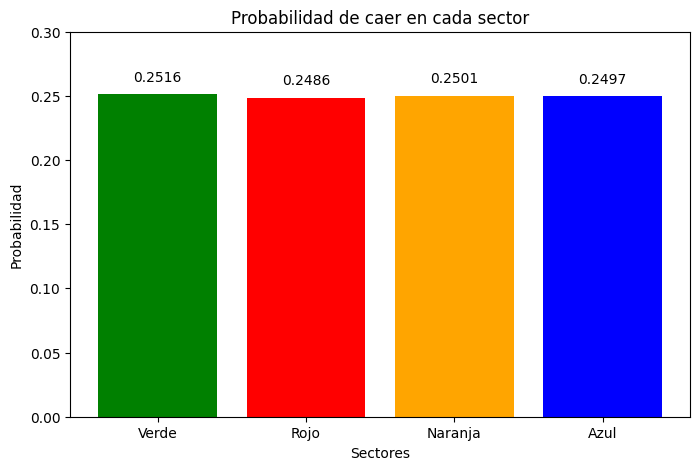

In [ ]:
import random
import matplotlib.pyplot as plt

# Definimos los sectores del tablero
sectores = ['Verde', 'Rojo', 'Naranja', 'Azul']
num_sectores = len(sectores)

# Configuración de la simulación
intentos = 100000  # Número de lanzamientos a simular
posicion_actual = 0  # Empezamos en el sector Verde
contador_visitas = [0] * num_sectores  # Para contar cuántas veces caemos en cada sector

# Simulación de los lanzamientos
for _ in range(intentos):
    # Lanzamos dos monedas (0 = cruz, 1 = cara)
    moneda1 = random.randint(0, 1)
    moneda2 = random.randint(0, 1)
    caras = moneda1 + moneda2

    # Calculamos la nueva posición
    posicion_actual = (posicion_actual + caras) % num_sectores

    # Registramos la visita al sector
    contador_visitas[posicion_actual] += 1

# Calculamos las probabilidades
probabilidades = [contador/intentos for contador in contador_visitas]

# Mostramos los resultados
print("\nResultados después de", intentos, "intentos:")
for i in range(num_sectores):
    print(f"{sectores[i]}: {probabilidades[i]:.4f} ({contador_visitas[i]} visitas)")

# Creamos un gráfico de barras
plt.figure(figsize=(8, 5))
colores = ['green', 'red', 'orange', 'blue']
plt.bar(sectores, probabilidades, color=colores)
plt.title('Probabilidad de caer en cada sector')
plt.xlabel('Sectores')
plt.ylabel('Probabilidad')
plt.ylim(0, 0.3)  # Ajustamos el límite del eje Y para mejor visualización

# Añadimos los valores exactos encima de cada barra
for i in range(num_sectores):
    plt.text(i, probabilidades[i]+0.01, f"{probabilidades[i]:.4f}", ha='center')

plt.show()